# [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/pdf/1409.1556.pdf)

by Simonyan and Zisserman, 2015

## Task

The task is a straight-forward supervised object recognition task. Given pixel (RGB) image representations, we want to generate labels categorizing the object in the image.

For example, in the CIFAR-10 challenge, we want to classify 32x32 pixel images into the following 10 classes

![Cifar-10 image examples](img/cifar-10.png)

## Datasets

The paper uses the [ImageNet (ILSVRC) dataset](http://www.image-net.org/challenges/LSVRC) but given the size of that dataset, we implement the same architecture on some smaller image recognition datasets: CIFAR-10 and CIFAR-100.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. CIFAR-100 is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 50000 training images and 10000 test images. State of the art performance is [~96.5% on CIFAR-10](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130) and [~75.7% on CIFAR-100](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d313030).

## Architecture

The paper implements a fairly standard deep convolutional network architecture. The defining characteristics are the small receptive field sizes (convolutional filters are 3x3) and the stacking of multiple convolutional layers between each pooling step. We implement the best performing (and deepest) neural architecture from the paper: configuration E.

![VGG architecture configurations](img/vgg-arch.png)

## Results

This architecture was one of the top-performing models submitted to ImageNet (ILSVRC) in 2014.

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

import training
import vgg.model
import evaluation

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
label_map = { 
    0: "airplane",
    1: "automobile", 
    2: "bird",
    3: "cat", 
    4: "deer", 
    5: "dog", 
    6: "frog",
    7: "horse",
    8: "ship", 
    9: "truck"
}

In [4]:
x_shape = (1000, 32, 32, 3)
model = vgg.model.construct_model(vgg.model.CONFIG, num_classes=10)
model = training.load_latest_checkpoint(model, "..", x_shape)

Loading model from latest checkpoint: ../checkpoints/ckpt-1953
INFO:tensorflow:Restoring parameters from ../checkpoints/ckpt-1953


In [5]:
from tensorflow.keras.datasets import cifar10, cifar100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
sample_n = 20
forward = model.predict(x_test[:sample_n])
predictions = np.argmax(forward, axis=1)

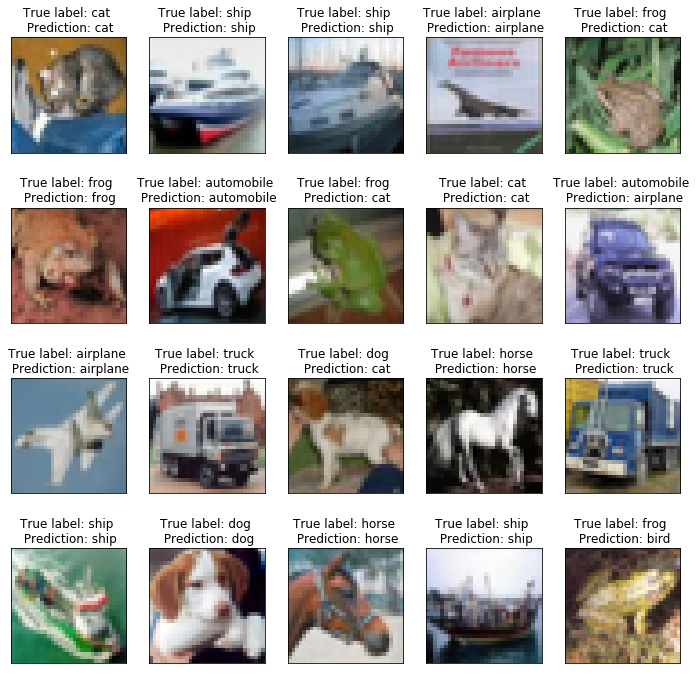

In [6]:
fig, axs = plt.subplots(4, 5, figsize=(12, 12))
for i, img, pred, label in zip(range(sample_n), x_test[:sample_n], predictions, y_test.squeeze(axis=1)[:sample_n]):
    title = "True label: %s \n Prediction: %s" % (label_map[label], label_map[pred])
    ax = axs[i // 5][i % 5]
    ax.set_title(title)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.imshow(img)